<a href="https://colab.research.google.com/github/JLuceroVasquez/challenge-telecom-x-latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desaf√≠o TelecomX
La empresa TelecomX enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes.

En este desaf√≠o se recopil√≥, proces√≥ y analiz√≥ los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa. A partir del an√°lisis, la empresa podr√° realizar modelos predictivos y desarrollar estrategias para reducir la evasi√≥n.

In [1]:
#Se importan los requisitos
import requests #Para leer los datos del API.
import json #Para cargar los datos del API como una lista de diccionario.
import pandas as pd #Para cargar los datos del API en una dataframe de Pandas.
import numpy as np #Para configurar el tipo de datos en columnas.
import matplotlib.pyplot as plt #Para graficar los diagramas de dispersi√≥n y l√≠nea de tendencia.
import matplotlib.axes #Para el tipado tyhints en las funciones que grafican sobre ejes.
from typing import Dict, Any, Optional #Para el tipado tyhints en las funciones que grafican sobre ejes.
import seaborn as sns #Para graficar los diagramas de boxplot y pointplot.
import plotly.express as px #Para graficar los diagramas de l√≠neas y barras.

##üìå Extracci√≥n

In [2]:
#Se almacena la direcci√≥n URL de la API en una variable de alcance global.
url = 'https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json'

#Cargamos la consulta a la API en la variable datos_churn.
datos_churn = requests.get(url)
type(datos_churn)

requests.models.Response

In [3]:
#Convertimos los datos de la consulta en texto con el m√©todo text.
#Almacenamos los datos leidos como texto en la variable resultado.
resultado = json.loads(datos_churn.text)
#La API transmite los datos en una lista de diccionario, que hemos cargado en la variable resultado.
type(resultado)

list

In [4]:
#Convertimos los datos de la lista de diccionario en un dataframe con la funci√≥n pd.DataFrame().
df = pd.DataFrame(resultado)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [5]:
#Usamos el m√©todo pd.json_normalize para convertir los datos anidados en columnas.
df_plano = pd.json_normalize(resultado)
df_plano.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

##üîß Transformaci√≥n

###Conoce el conjunto de datos
Se encontr√≥ que ninguna columna tiene valores nulos. Y se cambi√≥ el nombre de las columnas para que coincidan con el diccionario de datos.

In [6]:
#Se consulta la cantidad de registros no nulos y el tipo de datos de cada columna.
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
#Se renombran las columnas para estar alineados al diccionario de datos.
dict_columnas = {'customer.gender':'gender', 'customer.SeniorCitizen':'SeniorCitizen'
                 ,'customer.Partner':'Partner', 'customer.Dependents':'Dependents',
                 'customer.tenure':'tenure', 'phone.PhoneService':'PhoneService',
                 'phone.MultipleLines':'MultipleLines', 'internet.InternetService':'InternetService',
                 'internet.OnlineSecurity':'OnlineSecurity', 'internet.OnlineBackup':'OnlineBackup',
                 'internet.DeviceProtection':'DeviceProtection', 'internet.TechSupport':'TechSupport',
                 'internet.StreamingTV':'StreamingTV', 'internet.StreamingMovies':'StreamingMovies',
                 'account.Contract':'Contract', 'account.PaperlessBilling':'PaperlessBilling',
                 'account.PaymentMethod':'PaymentMethod', 'account.Charges.Monthly':'Charges.Monthly',
                 'account.Charges.Total':'Charges.Total'}

df_plano.rename(dict_columnas, axis=1, inplace=True)
df_plano.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

###Comprobaci√≥n de incoherencia en los datos
En esta etapa se prest√≥ atenci√≥n a valores nulos, ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Aunque no hay valores duplicados y no hay valores nulos, se encontraron las siguientes incoherencias:
- **Columnas**: Los nombres tienen mayusculas, min√∫sculas y puntos.
- **`Churn`**: Tiene 224 registros con valores ausentes.
- **`Charges.Total`**: Tiene 11 registros con valores ausentes. Tambi√©n tiene error de formato. Debe ser de tipo float.

Adem√°s, para facilitar el procesamiento matem√°tico y comprensi√≥n de la informaci√≥n, se realiz√≥:
- **Traducci√≥n**: A espa√±ol de las columnas `gender`, `PaymentMethod` y `Contract`.
- **Cambio del tipo de dato**: A bool de las columnas `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, `StreamingMovies` y `PaperlessBilling`.



####Valores √∫nicos en cada columna

In [8]:
#Se consulta los valores √∫nicos en cada columna, y sin son menores de 10 se muestran.
for columna in df_plano.columns:
  valores = df_plano[columna].unique()
  cantidad = len(valores)
  print(f'La columna "{columna}" tiene {cantidad} valores √∫nicos.')
  if cantidad < 10:
    print(valores)
    print('-'*50)

La columna "customerID" tiene 7267 valores √∫nicos.
La columna "Churn" tiene 3 valores √∫nicos.
['No' 'Yes' '']
--------------------------------------------------
La columna "gender" tiene 2 valores √∫nicos.
['Female' 'Male']
--------------------------------------------------
La columna "SeniorCitizen" tiene 2 valores √∫nicos.
[0 1]
--------------------------------------------------
La columna "Partner" tiene 2 valores √∫nicos.
['Yes' 'No']
--------------------------------------------------
La columna "Dependents" tiene 2 valores √∫nicos.
['Yes' 'No']
--------------------------------------------------
La columna "tenure" tiene 73 valores √∫nicos.
La columna "PhoneService" tiene 2 valores √∫nicos.
['Yes' 'No']
--------------------------------------------------
La columna "MultipleLines" tiene 3 valores √∫nicos.
['No' 'Yes' 'No phone service']
--------------------------------------------------
La columna "InternetService" tiene 3 valores √∫nicos.
['DSL' 'Fiber optic' 'No']
--------------

####Registros nulos

In [9]:
#Se imprime la cantidad de registros nulos.
print(f'Cantidad de registros nulos:\n{df_plano.isnull().sum()}')

Cantidad de registros nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


####Registros duplicados

In [10]:
#Se imprime la cantidad de registros duplicados.
print('La cantidad de registros duplicados son:',df_plano.duplicated().sum())

La cantidad de registros duplicados son: 0


####Registros vac√≠os

In [11]:
#Se calcula la cantidad de registros vac√≠os por columna.
'''
Se elimina los espacios vac√≠os al inicio y final de cada valor de la columna.
Previamente se convierten los valores a string para poder aplicar el .str y
consecuentemente el .strip().
Lo anterior devuelve una serie de Pandas con valores booleanos, donde True
coincide con celdas vac√≠as y que al aplicarse el m√©todo.sum() se suman como 1.
Como resultado, se obtiene una serie cuyos √≠ndices son el nombre de columnas y
los valores son la cantidad de celdas vac√≠as.
'''
df_plano.apply(lambda x: x.astype(str).str.strip()=='').sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64

###Manejo de inconsistencias
- **Columnas**: Todos los nombres est√°n en min√∫sculas y separados por guiones bajos.
- **`Churn`**: No tiene registros con valores ausentes.
- **`Charges.Total`**: Es de tipo float, teniendo como valor NaN en los registros donde hubieron valores ausentes.

####Nombres de columnas

In [12]:
#Se escriben los nombres de las columnas en min√∫sculas y con guiones bajos en lugar de espacios.
df_plano.columns = df_plano.columns.str.lower().str.replace('.', '_')
df_plano.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

####Columna **`Churn`**

In [13]:
#Se eliminan los registros con valores vac√≠os en Churn mediante indexaci√≥n booleana.
df_plano = df_plano[df_plano.churn !='']
#Se consulta la cantidad de registros seg√∫n el valor en la columna churn.
df_plano.churn.value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

####Columna **`Charges.Total`**

In [14]:
#En la etapa anterior, se conoci√≥ que hay 11 registros vac√≠os.
#Se eliminan espacios al inicio y final de cada registro.
df_plano['charges_total'].apply(lambda x: x.strip())

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7262      742.9
7263     1873.7
7264      92.75
7265    4627.65
7266     3707.6
Name: charges_total, Length: 7043, dtype: object

In [15]:
#Se corrobora cuantos registros de la columna contienen caracteres especiales o est√°n vac√≠os.
'''
Se utiliza dos condiciones en una sola expresi√≥n regular:

  - [^\d.]
    para identificar caract√©res que no sean n√∫meros o 1 punto.

  - (?=(?:.*\\.){2,})
    para identificar la presencia m√∫ltiples puntos.

  - ^$
    para identificar si el registro est√° vac√≠o.
'''
regex = r'[^\d.]|(?=(?:.*\.){2,})|^$'
df_plano['charges_total'].str.contains(regex, regex=True).sum()

np.int64(11)

In [16]:
#Se encontraron 11 registros con formatos problem√°ticos, se visualizan para ver si se pueden rescatar.
df_plano.charges_total[df_plano.charges_total.str.contains(regex, regex=True)]

975      
1775     
1955     
2075     
2232     
2308     
2930     
3134     
3203     
4169     
5599     
Name: charges_total, dtype: object

In [17]:
#Se comprueba que los 11 registros est√°n vac√≠os, y se procede con la conversi√≥n.
'''
El par√°metro coerce indica que los errores de conversi√≥n ser√°n tratados como valore nulos.
'''
df_plano['charges_total'] = pd.to_numeric(df_plano['charges_total'], errors='coerce', downcast='float')
df_plano['charges_total'].dtypes

dtype('float32')

In [18]:
df_plano.charges_total[df_plano.charges_total.isna()]

975    NaN
1775   NaN
1955   NaN
2075   NaN
2232   NaN
2308   NaN
2930   NaN
3134   NaN
3203   NaN
4169   NaN
5599   NaN
Name: charges_total, dtype: float32

###Estandarizaci√≥n y transformaci√≥n de datos
- **Se tradujo**: A espa√±ol de las columnas `gender`, `churn`, `InternetService`, `PaymentMethod` y `Contract`.
- **Se cambio el tipo de dato**: A bool de las columnas `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, `StreamingMovies` y `PaperlessBilling`.

####Traducci√≥n al espa√±ol de columnas

In [19]:
#Se remplazaron los valores de la columna gender por su traducci√≥n en espa√±ol.
df_plano['gender'] = df_plano['gender'].apply(lambda x: x.replace('Female','Femenino').replace('Male','Masculino'))
df_plano['gender'].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [20]:
#Se remplazaron los valores de la columna churn por su traducci√≥n en espa√±ol.
df_plano['churn'] = df_plano['churn'].apply(lambda x: x.replace('Yes', 'Si'))
df_plano['churn'].unique()

array(['No', 'Si'], dtype=object)

In [21]:
#Se remplazaron los valores de la columna internetservice por su traducci√≥n en espa√±ol.
df_plano.internetservice = df_plano.internetservice.apply(lambda x: x.replace('Fiber optic','Fibra √≥ptica'))
df_plano.internetservice.unique()

array(['DSL', 'Fibra √≥ptica', 'No'], dtype=object)

In [22]:
#Se remplazaron los valores de la columna paymentmethod por su traducci√≥n en espa√±ol.
df_plano.paymentmethod = df_plano.paymentmethod.apply(lambda x: x.replace('Mailed check','Cheque por correo').
                                                      replace('Electronic check','Cheque electr√≥nico').
                                                      replace('Credit card (automatic)','Tarjeta de cr√©dito (autom√°tico)').
                                                      replace('Bank transfer (automatic)','Transferencia bancaria (autom√°tico)'))
df_plano.paymentmethod.unique()

array(['Cheque por correo', 'Cheque electr√≥nico',
       'Tarjeta de cr√©dito (autom√°tico)',
       'Transferencia bancaria (autom√°tico)'], dtype=object)

In [23]:
#Se remplazaron los valores de la columna contract por su traducci√≥n en espa√±ol.
df_plano.contract = df_plano.contract.apply(lambda x: x.replace('One year','Un a√±o').
                                            replace('Month-to-month', 'Mes a mes').
                                            replace('Two year', 'Dos a√±os'))
df_plano.contract.unique()

array(['Un a√±o', 'Mes a mes', 'Dos a√±os'], dtype=object)

####Tipado de columnas booleanas

In [24]:
#Se convierten los valores de la columna "seniorcitizen".
'''
Se emple√≥ el m√©todo .astype porque la columna tiene valores num√©ricos 0 y 1 que
Pandas traduce autom√°ticamente en False y True.
'''
df_plano.seniorcitizen = df_plano.seniorcitizen.astype('bool')
df_plano.seniorcitizen.dtypes

dtype('bool')

In [25]:
#Se convierten los valores de 11 columnas cuyos valores √∫nicos fueron 'yes' y 'no'.
columnas_bool = ['partner', 'dependents', 'phoneservice', 'multiplelines',
                 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                 'techsupport','streamingtv', 'streamingmovies',
                 'paperlessbilling']
df_plano[columnas_bool] = df_plano[columnas_bool].map(lambda x: True if x == 'Yes' else False).astype('bool')
df_plano[columnas_bool].dtypes

partner             bool
dependents          bool
phoneservice        bool
multiplelines       bool
onlinesecurity      bool
onlinebackup        bool
deviceprotection    bool
techsupport         bool
streamingtv         bool
streamingmovies     bool
paperlessbilling    bool
dtype: object

###Columnas de cuentas diarias y servicios contratados

####Columna nueva: Cuenta diaria

In [26]:
#Se calculan los valores de la columna nueva cuenta_diaria.
df_plano['cuenta_diaria'] = df_plano.charges_monthly / 30
df_plano['cuenta_diaria'].dtypes

dtype('float64')

####Columna nueva: Servicios contratados

In [27]:
#Se calculan los valores de la columna nueva servicios_contratados.
'''
Se suma los valores en las columnas del tipo servicio con los valores tipo bool
de una copia temporal de la columna internet.
'''
columnas_servicios = ['phoneservice', 'multiplelines', 'onlinesecurity',
                      'onlinebackup', 'deviceprotection', 'techsupport',
                      'streamingtv', 'streamingmovies']

df_plano['servicios_contratados'] = df_plano[columnas_servicios].sum(axis=1) + df_plano.internetservice.apply(lambda x: True if x in {'DSL', 'Fibra √≥ptica'} else False)
df_plano['servicios_contratados'].dtypes

dtype('int64')

##üìä Carga y an√°lisis

###Carga

In [28]:
#Se asigna la ubicaci√≥n donde se descargar√° el df.
path = '/content/df_plano.json'

#Se exporta el df a un archivo json.
df_plano.to_json(path)

#Se lee el archivo para verificar que se carg√≥ correctamente.
df_plano_exp = pd.read_json(path)
df_plano_exp.head(3)

customerid churn     gender  seniorcitizen  partner  dependents  tenure  \
0  0002-ORFBO    No   Femenino          False     True        True       9   
1  0003-MKNFE    No  Masculino          False    False       False       9   
2  0004-TLHLJ    Si  Masculino          False    False       False       4   

   phoneservice  multiplelines internetservice  ...  techsupport  streamingtv  \
0          True          False             DSL  ...         True         True   
1          True           True             DSL  ...        False        False   
2          True          False    Fibra √≥ptica  ...        False        False   

   streamingmovies   contract  paperlessbilling       paymentmethod  \
0            False     Un a√±o              True   Cheque por correo   
1             True  Mes a mes             False   Cheque por correo   
2            False  Mes a mes              True  Cheque electr√≥nico   

  charges_monthly  charges_total cuenta_diaria  servicios_contratados  
0            65.6     593.299988      2.186667                      5  
1            59.9     542.400024      1.996667                      4  
2            73.9     280.850006      2.463333                      3  

[3 rows x 23 columns]

###An√°lisis descriptivo

In [29]:
df_plano.describe()

tenure  charges_monthly  charges_total  cuenta_diaria  \
count  7043.000000      7043.000000    7032.000000    7043.000000   
mean     32.371149        64.761692    2283.300537       2.158723   
std      24.559481        30.090047    2266.771729       1.003002   
min       0.000000        18.250000      18.799999       0.608333   
25%       9.000000        35.500000     401.450012       1.183333   
50%      29.000000        70.350000    1397.475098       2.345000   
75%      55.000000        89.850000    3794.737549       2.995000   
max      72.000000       118.750000    8684.799805       3.958333   

       servicios_contratados  
count            7043.000000  
mean                4.146244  
std                 2.312720  
min                 1.000000  
25%                 2.000000  
50%                 4.000000  
75%                 6.000000  
max                 9.000000

###Distribuci√≥n de evasi√≥n
En esta secci√≥n, se defini√≥ la funci√≥n **`agrupar_prob`** que permite generar dataframes derivados de df_plano donde los √≠ndices son variables de agrupamiento y la columna es la probabilidad de churn. Es as√≠ que se emple√≥ la **funci√≥n** e iteraciones **for** para generar listas de dataframes que agrupan la **probabilidad de evasi√≥n** por **variables categ√≥ricas** y **variables num√©ricas**.

####Funci√≥n **`agrupar_prob`**

In [30]:
def agrupar_prob(data: pd.core.frame.DataFrame, cols: list, col_unstack: str, tag_prob: str, name_prob: str) -> pd.core.frame.DataFrame:
  '''
  Funci√≥n que devuelve un dataframe con el c√°lculo de probabilidad de una
  variable categ√≥rica por cada valor de una o m√°s columnas del dataframe
  original.

  data: pd.core.frame.DataFrame
    Dataframe con los datos originales.
  cols: list
    Lista con los nombres de las columnas que se agrupar√°n. El √∫ltimo nombre
    debe ser el de la columna que contiene los valores de probabilidad.
    Ejemplo: Si se calcula la probabilidad de churn, el √∫ltimo nombre de la
    lista debe coincidir con el de la columna que contiene las etiquetas de "Si"
    dejo o "No" dejo el cliente la empresa.
  col_unstack: str
    Nombre de la columna que contiene los valores de probabilidad.
    Ejemplo: 'churn'.
  tag_prob: str
    Nombre del valor que se contar√° para calcular la probabilidad.
    Ejemplo: Si se desea calcular la probabilidad de Churn, entonces se
    escribir√° 'Si'.
  name_prob: str
    Nombre de la probabilidad calculada.
    Ejemplo: 'churn rate'.
  return = percentdf: pd.core.frame.DataFrame
    Dataframe con las probabilidades calculadas por cada valor de las columnas
    de agrupamiento.
  '''
  if cols[-1] == col_unstack:
    '''
    Las variables de agrupamiento se convierten en √≠ndice m√∫ltiples de la serie, y
    los valores son la cantidad de registros en cada combinaci√≥n de √≠ndices.
    '''
    groupedserie = data.groupby(by=cols).size()
    '''
    Se convierten los valores del √∫ltimo √≠ndice en columnas del dataframe.
    Se completa con cero las celdas donde hay valores NaN.
    '''
    unstackdf = groupedserie.unstack(level=cols[-1], fill_value=0)
    percentdf = (unstackdf[tag_prob]/unstackdf.sum(axis=1))*100
    percentdf.name = name_prob
    return percentdf

  else:
    print(f'Error {cols[-1]} ‚â† {col_unstack}. El √∫ltimo elemento de la lista correspondiente al par√°metro "cols" debe ser igual al valor del par√°metro "col_unstack"')

####Listas para el c√°lculo de probabilidad de evasi√≥n
Se generaron listas de listas con los nombres de las variables que se usar√°n como **par√°metros de la funci√≥n `agrupar_prob`** en el an√°lisis cualitativo y cuantitativo.

In [31]:
'''
Se escriben listas con las columnas que se emplear√°n en el an√°lisis de
probabilidad de Churn seg√∫n variables categ√≥ricas y num√©ricas.
'''
cols_sociales = ['gender','seniorcitizen','partner','dependents']
cols_negocio = ['paymentmethod','contract','paperlessbilling']
cols_numericas = ['tenure','cuenta_diaria', 'servicios_contratados']

'''
Se crean dos listas vac√≠as, la primera contendr√° listas con el nombre de
columnas cualitativas y la segunda contendr√°n listas con los nombres de
columnas cuantitativas.
'''
listas_cols_cualitativas = []
listas_cols_cuantitativas = []

In [32]:
'''
Mediante un ciclo for, se generan 3 listas cuyo √∫ltimo elemento es el nombre de
la columna 'churn' precedido por el nombre de una variable num√©rica.
'''
for i in range(3):
  lista = ['churn']
  lista.insert(0, cols_numericas[i]) #Se inserta el nombre de la columna num√©rica en la posici√≥n inicial de la lista.
  listas_cols_cuantitativas.append(lista) #Se a√±ade la lista a la variables que contendr√°n las listas de columnas cuantitativas.

#Se verificar el contenido de la variable listas_cols_cuantitativas.
listas_cols_cuantitativas

[['tenure', 'churn'],
 ['cuenta_diaria', 'churn'],
 ['servicios_contratados', 'churn']]

In [33]:
'''
Mediante un ciclo for y dos contadores, se generan 12 listas cuyo √∫ltimo
elemento es el nombre d ela columna 'churn' precedidos por variables
categ√≥ricas: una variable de tipo 'negocio' y otra de tipo 'social'.
'''
contador1 = 0 #Servir√° para alterar el primer elemento de la lista.
contador2 = 0 #Servir√° para alterar el segundo elemento de la lista.
for i in range(15): #Se itera 15 veces, entre 0 y 14, porque se desean 12 listas generadas con el bloque if y se ejecutar√° 3 veces el bloque else.
  if contador1 <4: #El contador asume valores entre 0 y 3, que son los √≠ndices de los elementos en la lista de variables sociales.
    lista = ['churn']
    lista.insert(0, cols_negocio[contador2]) #Se a√±ade la variable de negocio al comienzo de la lista.
    lista.insert(0, cols_sociales[contador1]) #Sobre lo anterior, se a√±ade la variable social al comienzo de la lista.
    listas_cols_cualitativas.append(lista)
    contador1 += 1 #En cada iteraci√≥n, mientras el contador 1 sea como m√°ximo 3, se suma 1.
  else:
    contador1 = 0 #Cuando el contador 1 es igual a 4, vuelve a cero. Esto permitir√° combinar todas las variables sociales con la nueva variable de negocio de la siguiente iteraci√≥n.
    contador2 += 1 #Cuando el contador 1 es igual a 4, el contador 2 avanza en 1. Esto cambiar√° la variable de negocio (segundo elemento de la lista) en la siguiente iteraci√≥n.

listas_cols_cualitativas

[['gender', 'paymentmethod', 'churn'],
 ['seniorcitizen', 'paymentmethod', 'churn'],
 ['partner', 'paymentmethod', 'churn'],
 ['dependents', 'paymentmethod', 'churn'],
 ['gender', 'contract', 'churn'],
 ['seniorcitizen', 'contract', 'churn'],
 ['partner', 'contract', 'churn'],
 ['dependents', 'contract', 'churn'],
 ['gender', 'paperlessbilling', 'churn'],
 ['seniorcitizen', 'paperlessbilling', 'churn'],
 ['partner', 'paperlessbilling', 'churn'],
 ['dependents', 'paperlessbilling', 'churn']]

####Dataframes agrupados
Se generaron 12 dataframes que agrupan la probabilidad de evasi√≥n por variables categ√≥ricas, y 3 dataframes que agrupan la probabilidad de evasi√≥n variables num√©ricas.

In [34]:
#Se crearon listas vac√≠as para almacenar los dataframes.
df_agrupados_cuali = []
df_agrupados_cuanti = []

In [35]:
#Se a√±adieron los dataframe agrupados por variables cualitativas.
for i in range(len(listas_cols_cualitativas)):
  df = agrupar_prob(df_plano, listas_cols_cualitativas[i], 'churn', 'Si', 'churn_rate')
  df_agrupados_cuali.append(df)

In [36]:
#Se verifica la lista con los dataframes generados.
df_agrupados_cuali

[gender     paymentmethod                      
 Femenino   Cheque electr√≥nico                     44.615385
            Cheque por correo                      19.280206
            Tarjeta de cr√©dito (autom√°tico)        17.420213
            Transferencia bancaria (autom√°tico)    17.258883
 Masculino  Cheque electr√≥nico                     45.941423
            Cheque por correo                      18.944844
            Tarjeta de cr√©dito (autom√°tico)        13.116883
            Transferencia bancaria (autom√°tico)    16.137566
 Name: churn_rate, dtype: float64,
 seniorcitizen  paymentmethod                      
 False          Cheque electr√≥nico                     42.574816
                Cheque por correo                      17.391304
                Tarjeta de cr√©dito (autom√°tico)        13.066872
                Transferencia bancaria (autom√°tico)    15.636918
 True           Cheque electr√≥nico                     53.367003
                Cheque por correo      

In [37]:
#Se a√±adieron los dataframe agrupados por variables cuantitativas.
for i in range(len(listas_cols_cuantitativas)):
  df = agrupar_prob(df_plano, listas_cols_cuantitativas[i], 'churn', 'Si', 'churn_rate')
  df_agrupados_cuanti.append(df)

In [38]:
#Se verifica la lista con los dataframes generados.
df_agrupados_cuanti

[tenure
 0      0.000000
 1     61.990212
 2     51.680672
 3     47.000000
 4     47.159091
         ...    
 68     9.000000
 69     8.421053
 70     9.243697
 71     3.529412
 72     1.657459
 Name: churn_rate, Length: 73, dtype: float64,
 cuenta_diaria
 0.608333      0.0
 0.613333      0.0
 0.618333      0.0
 0.623333      0.0
 0.625000      0.0
             ...  
 3.940000      0.0
 3.945000    100.0
 3.953333      0.0
 3.955000      0.0
 3.958333      0.0
 Name: churn_rate, Length: 1585, dtype: float64,
 servicios_contratados
 1    10.917722
 2    30.966240
 3    44.917258
 4    36.476684
 5    31.344902
 6    25.550661
 7    22.485207
 8    12.405063
 9     5.288462
 Name: churn_rate, dtype: float64]

###Recuento de evasi√≥n por categor√≠a

In [66]:
#Establecemos un tema art√≠stico seaborn para los gr√°ficos que se generar√°n.
sns.set_theme(style = 'white') #El grid ser√° de color blanco.

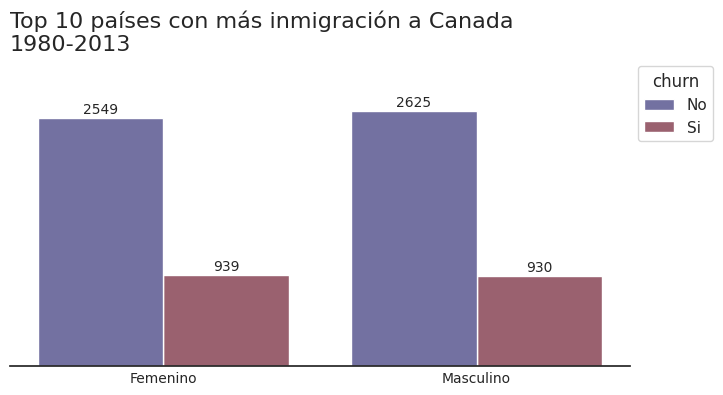

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=df_plano, x='gender', hue='churn', multiple="dodge", palette='icefire', shrink=.8, ax=ax)

ymax= max(ax.get_ylim())*1.15
ax.set_ylim(0, ymax)

sns.despine(left=True)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.set_title('Top 10 pa√≠ses con m√°s inmigraci√≥n a Canada\n1980-2013', loc='left', fontsize=16)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2  # Centrar el texto sobre la barra
    ax.text(x=x, y=height + 20, s=str(int(height)), ha='center', va='bottom', fontsize=10)

In [63]:
#Creamos la funci√≥n myhistplotter que permitir√° simplificar la sintaxis del c√≥digo para crear gr√°ficos de barra.
def myhistplotter(data:pd.core.frame.DataFrame,x:str,hue:Optional[str]=None,palette:Optional[str]='icefire',ax: Optional[matplotlib.axes.Axes]=None) -> matplotlib.axes.Axes:
  '''
  Funci√≥n para graficar un histograma con las bibliotecas Seaborn y Maplotlib.
  data: pd.core.frame.DataFrame
    Objeto dataframe de Pandas que contiene los datos que se graficaran.
  x: str
    Texto que coincide con el nombre de la columna del dataframe que se desea
    graficar.
  hue: Optional[str], default None
    Texto que coincide con el nombre de la columna del dataframe en base a
    cuyos valores se desea colorear las barras.
  palette: Optional[str], default 'icefire'
    Paleta de color de Seaborn que se emplear√° para colorear las barras.
  ax: matplotlib.axes.Axes, default None
		Ojeto de ejes de Maptloplib donde se dibuja el gr√°fico.
	return = ax: matplotlib.axes.Axes
		Ojeto de ejes de Maptloplib donde se dibuj√≥ el gr√°fico.
  '''
  #Se crea una figura con un eje en caso no se haya especificado un eje.
  if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

  #Se grafica un histograma con las categor√≠as de la columna x en el eje horizontal
  sns.histplot(data=data, x=x, hue=hue, multiple="dodge", palette=palette, shrink=.8, ax=ax)

  #Se establece el l√≠mite m√°ximo del eje vertical para tener m√°s espacios donde colocar texto.
  ymax = max(ax.get_ylim())*1.10
  ax.set_ylim(0, ymax)

  sns.despine(left=True) #Se quitan los bordes superior, derecho e izquierdo del gr√°fico.
  ax.yaxis.set_visible(False) #Se quita el eje Y.
  ax.tick_params(axis='x', which='both', size=0, labelsize=10) #Se reduce a cero el tama√±o de los marcadores y reduce a 8 los valores del eje X.
  ax.set_xlabel('') #Se establece como vac√≠o la etiqueta del eje X.
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Se mueve la leyenda fuera del gr√°fico, arriba a la izquierda.

  #Se itera con un ciclo for en las barras gr√°ficadas.
  for patch in ax.patches:
      height = patch.get_height() #Se almacena los datos de la altura de la barra en la variable height.
      x = patch.get_x() + patch.get_width() / 2 #Se almacena los datos del inicio m√°s la mitad del ancho de la barra en la variable x.
      #Se ubica el texto con la altura de la barra en las coordenadas (x, height), con una alineaci√≥n horizontal centrada y una alineaci√≥n vertical baja.
      ax.text(x=x, y=height + 20, s=str(int(height)), ha='center', va='bottom', fontsize=10)

  return ax

In [42]:
#Creamos la funci√≥n mypointplotter que permitir√° simplificar la sintaxis del c√≥digo para crear gr√°ficos de puntos.
def mypointplotter()

SyntaxError: expected ':' (ipython-input-42-3665762616.py, line 2)

####Gr√°ficos de barras con Seaborn
Se explor√≥ la distribuci√≥n de la evasi√≥n (churn) seg√∫n variables categ√≥ricas, como g√©nero, tipo de contrato y m√©todo de pago.

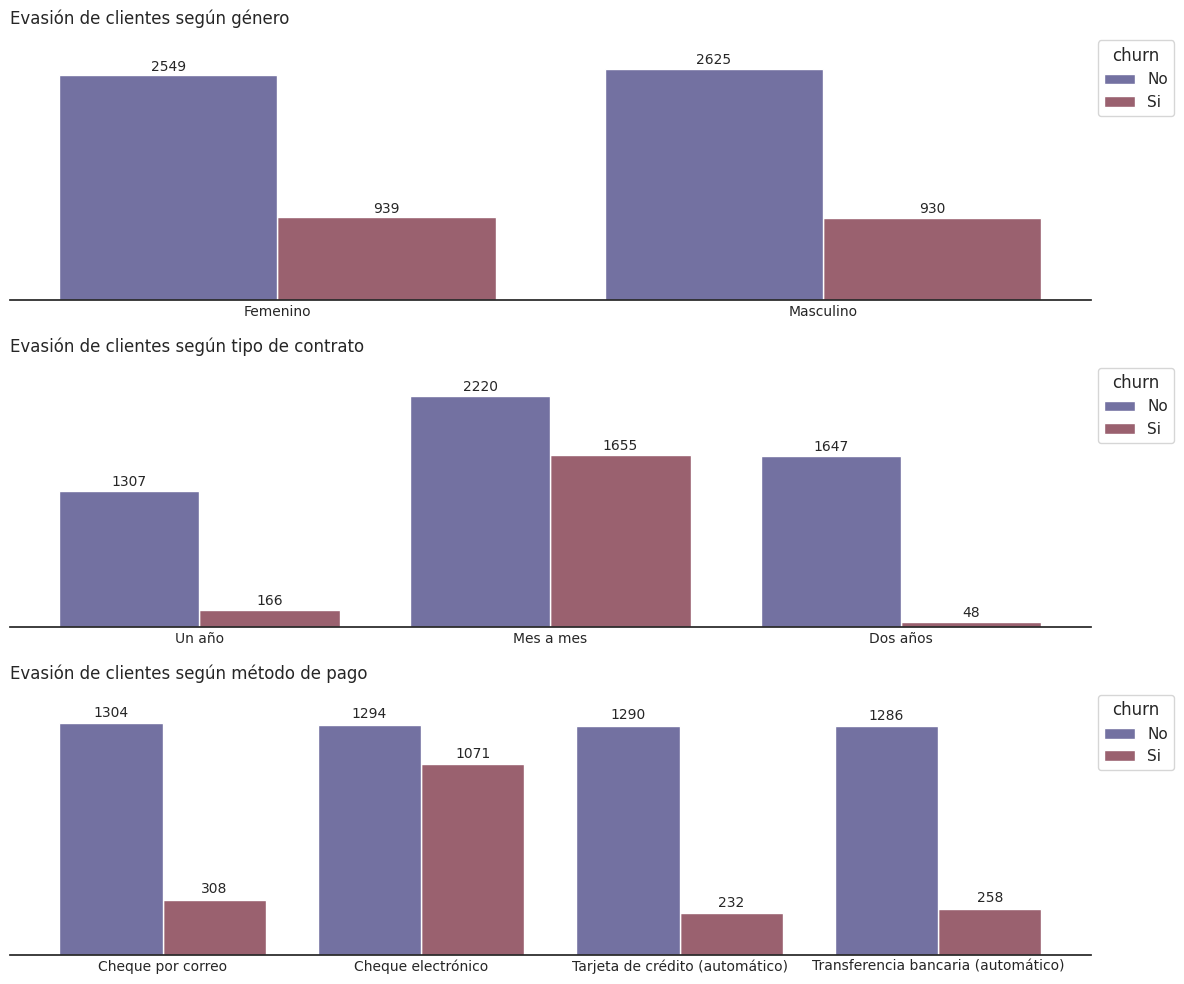

In [65]:
#Creamos la figura, de 1 fila y 3 columnas, asignando el lienzo y gr√°ficos a variables.
fig, axs = plt.subplots(3, 1, figsize=(12,10))

columnas = ['gender','contract','paymentmethod']
keywords = ['g√©nero','tipo de contrato','m√©todo de pago']

for i, ax in enumerate(axs.flat):
  myhistplotter(data = df_plano, x = columnas[i], hue='churn',ax=ax)
  ax.set_title(f'Evasi√≥n de clientes seg√∫n {keywords[i]}', loc='left', fontsize=12)

plt.tight_layout()

####Gr√°ficos de puntos con [Seaborn](https://seaborn.pydata.org/tutorial/categorical.html)
Se realizaron gr√°ficos de puntos para las **variables de negocio** `PaymentMethod`, `Contract` y `PaperlessBilling` en combinaci√≥n con las **variables demogr√°ficas** `gender`, `SeniorCitizen`, `Partner` y `Dependents`.

#####Gr√°ficos de la variable Gender

#####Gr√°ficos de la variable SeniorCitizen

#####Gr√°ficos de la variable Partner

#####Gr√°ficos de la variable Dependents

###Conteo de evasi√≥n por variable num√©rica

####Gr√°ficos de cajas y bigotes con Plotly

####Gr√°ficos de l√≠neas con Plotly
Se realizaron gr√°ficos de lineas de la `probabilidad churn` en funci√≥n de **variables num√©ricas** como `tenure`, `cuenta_diaria` y `servicios_contratados`.

#####Gr√°fico de la variable tenure

#####Gr√°fico de la variable cuenta_diaria

#####Gr√°fico de la variable servicios_contratados

###Gr√°ficos de dispersi√≥n y correlaci√≥n

####Correlaci√≥n entre % Churn y Tenure

####Correlaci√≥n entre % Churn y Cuenta diaria

####Correlaci√≥n entre % Churn y Cantidad de servicios contratados

##üìÑInforme final